In [39]:
install.packages('FactoMineR')

Installing FactoMineR [2.8] ...
	OK [linked cache]


In [40]:
table <- read.table('new-data.csv',sep=',', header=TRUE, dec='.')
head(table)
summary(table)

,Id,Depth,Depth2,Name,Long,Lat,Shore.distance
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>
1,0,1029.0,1025.775,Globicephala macrorhynchus,-16.69158,27.96593,3636
2,1,905.0,1232.125,Globicephala macrorhynchus,-18.03670,27.63775,2882
3,2,1468.5,1459.475,Globicephala macrorhynchus,-16.83167,28.08167,6679
4,3,1795.0,1835.425,Globicephala macrorhynchus,-17.16700,27.95033,8748
5,4,1803.0,1821.075,Globicephala macrorhynchus,-17.21733,27.91733,11677
6,5,1260.0,1320.625,Globicephala macrorhynchus,-17.28017,27.96350,6914


       Id             Depth            Depth2            Name          
 Min.   :  0.00   Min.   : -57.0   Min.   : -23.78   Length:449        
 1st Qu.: 37.00   1st Qu.: 310.4   1st Qu.: 364.80   Class :character  
 Median : 74.00   Median : 867.5   Median : 911.58   Mode  :character  
 Mean   : 77.99   Mean   : 957.3   Mean   : 985.32                     
 3rd Qu.:113.00   3rd Qu.:1448.6   3rd Qu.:1482.28                     
 Max.   :190.00   Max.   :3607.2   Max.   :3607.00                     
      Long             Lat        Shore.distance  
 Min.   :-18.87   Min.   :25.55   Min.   :   -35  
 1st Qu.:-16.89   1st Qu.:27.70   1st Qu.:  3012  
 Median :-15.82   Median :27.88   Median :  8169  
 Mean   :-16.06   Mean   :28.01   Mean   : 12981  
 3rd Qu.:-15.67   3rd Qu.:28.05   3rd Qu.: 12284  
 Max.   :-13.25   Max.   :31.97   Max.   :284663  

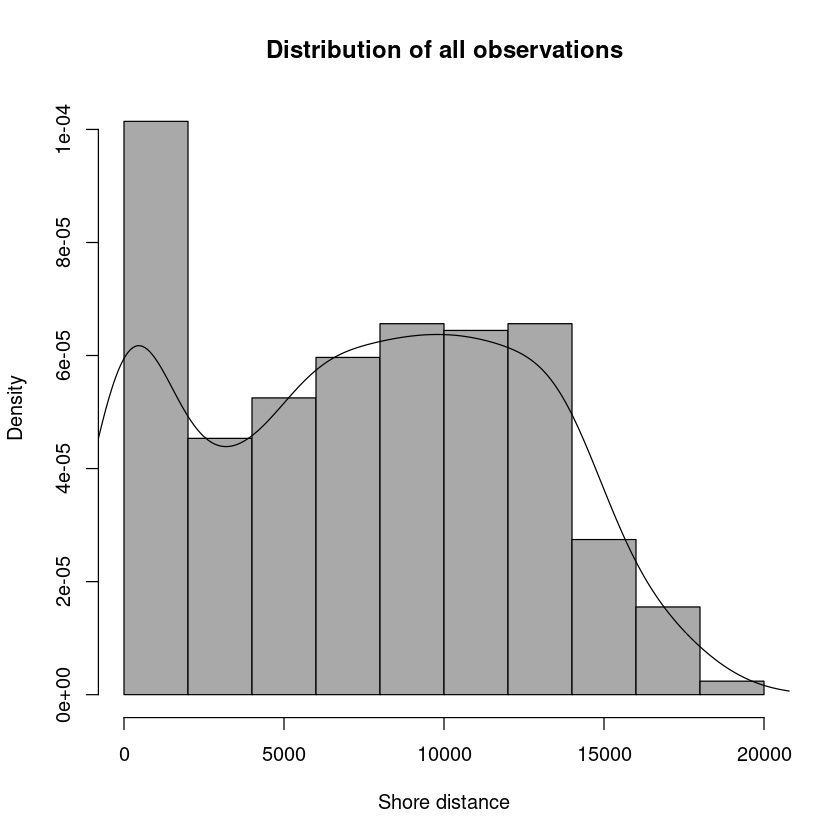

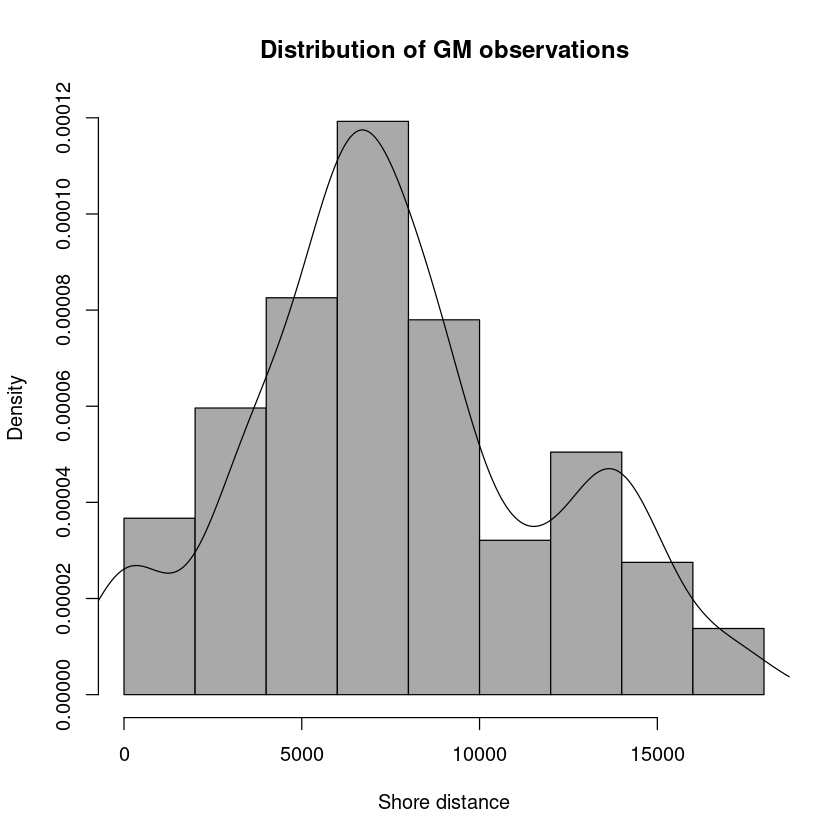

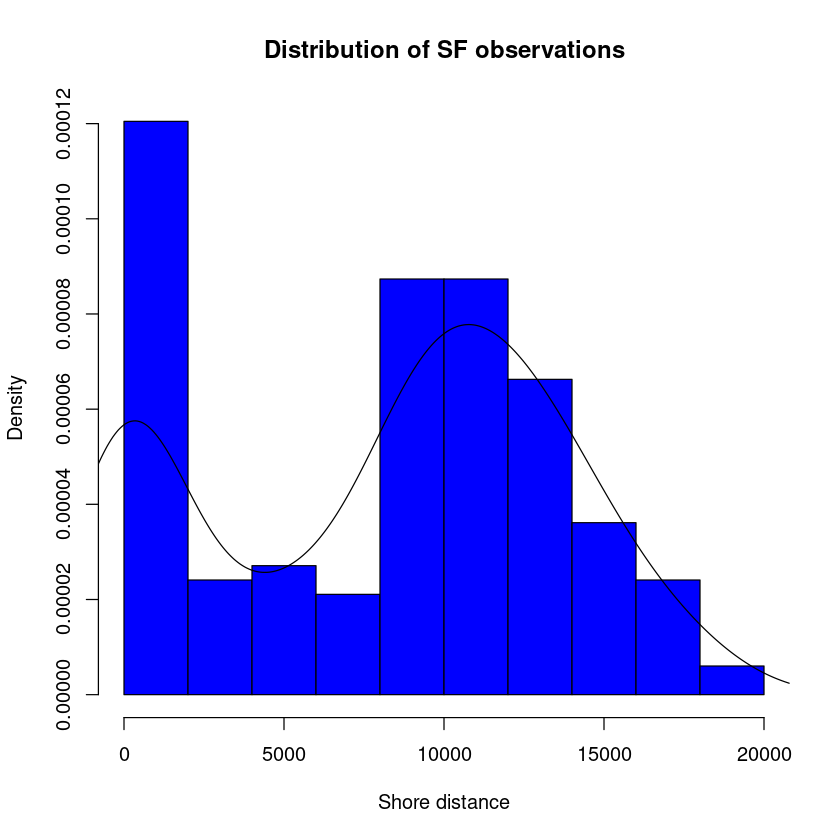

                            
                             <5000 5000-10000 10000-15000 15000-20000
  Globicephala macrorhynchus    27         55          23           4
  Stenella frontalis            50         43          60          13
  Tursiops truncatus            65         32          43           4

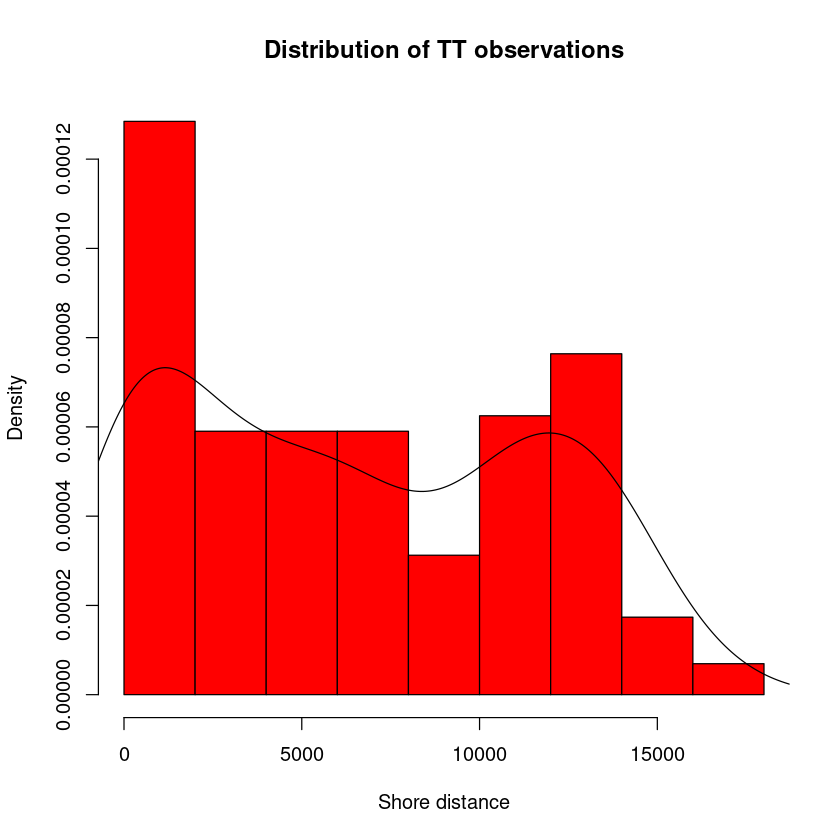

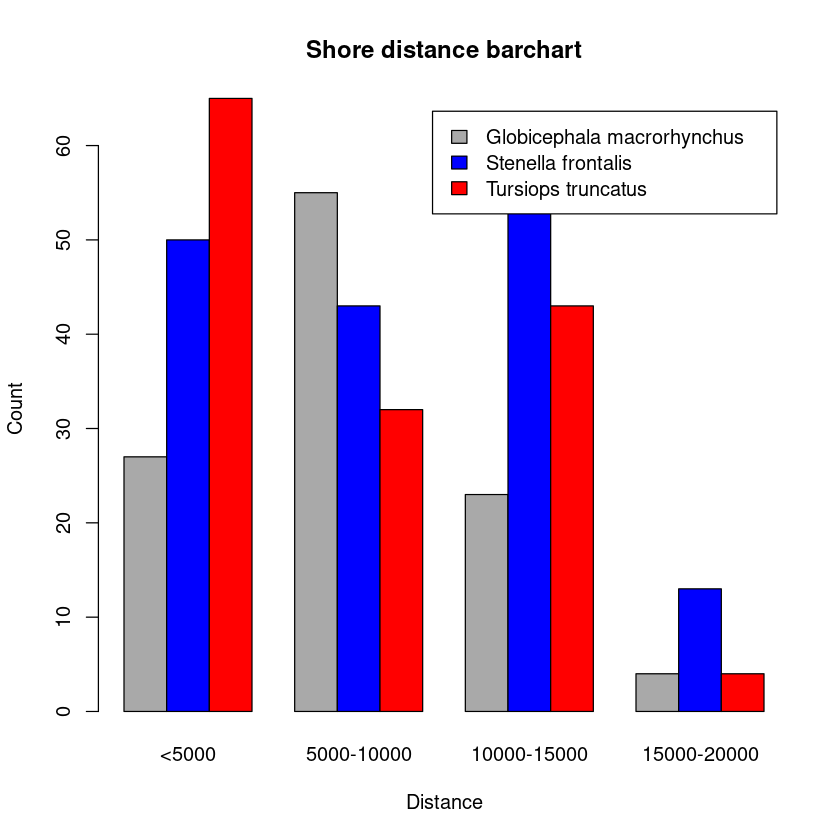

In [41]:
df <- data.frame(table$Name,table$Shore.distance)
colnames(df) = c('species','shore_distance')

hist(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000],nclass=10,freq=FALSE, col='darkgrey', main='Distribution of all observations', xlab='Shore distance')
lines(density(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000]))

hist(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000 & df$species=='Globicephala macrorhynchus'],nclass=10,freq=FALSE, col='darkgrey', main='Distribution of GM observations', xlab='Shore distance')
lines(density(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000 & df$species=='Globicephala macrorhynchus']))

hist(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000 & df$species=='Stenella frontalis'],nclass=10,freq=FALSE, col='blue', main='Distribution of SF observations', xlab='Shore distance')
lines(density(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000 & df$species=='Stenella frontalis']))

hist(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000 & df$species=='Tursiops truncatus'],nclass=10,freq=FALSE, col='red', main='Distribution of TT observations', xlab='Shore distance')
lines(density(df$shore_distance[df$shore_distance>0 & df$shore_distance<20000 & df$species=='Tursiops truncatus']))


#df$cat_shore = cut(df$shore_distance,breaks=c(0,1000,5000,10000,max(df$shore_distance)),include.lowest = TRUE,labels = c('<1000','1000-5000','5000-10000','>10000'))

#df$cat_shore = cut(df$shore_distance,breaks=c(0,1000,5000,10000,15000,20000),include.lowest = TRUE,labels = c('<1000','1000-50000','5000-10000','10000-15000','15000-20000'))

df$cat_shore = cut(df$shore_distance,breaks=c(0,5000,10000,15000,20000),include.lowest = TRUE,labels = c('<5000','5000-10000','10000-15000','15000-20000'))

#decoupe = quantile(df$shore_distance,probs=seq(0,1,0.25))
#df$cat_shore = cut(df$shore_distance,breaks=decoupe,include.lowest = TRUE, ,labels = c('<3000','3000-8000','8000-12000','>12000'))

#df

tbl_cont <- table(df$species,df$cat_shore)
tbl_cont

barplot(tbl_cont,
        main = "Shore distance barchart",
        xlab = "Distance", ylab = "Count",
        col = c("darkgrey", "blue", "red"),
        legend.text = rownames(tbl_cont),
        beside = TRUE) # Grouped bars


## Chi2 test


In [42]:
print("Observed values")
table_sum <- addmargins(tbl_cont, FUN = sum)      
table_sum

resultat = chisq.test(tbl_cont)
resultat

print("Expected values")
as.table(round(resultat$expected, 1))

print("Contributions")
round(100 * resultat$residuals^2 / resultat$statistic, 1)

print("Residuals")
round(resultat$residuals, 3)

[1] "Observed values"
Margins computed over dimensions
in the following order:
1: 
2: 


,<5000,5000-10000,10000-15000,15000-20000,sum
Globicephala macrorhynchus,27,55,23,4,109
Stenella frontalis,50,43,60,13,166
Tursiops truncatus,65,32,43,4,144
sum,142,130,126,21,419



	Pearson's Chi-squared test

data:  tbl_cont
X-squared = 36.429, df = 6, p-value = 2.275e-06


[1] "Expected values"


                            
                             <5000 5000-10000 10000-15000 15000-20000
  Globicephala macrorhynchus  36.9       33.8        32.8         5.5
  Stenella frontalis          56.3       51.5        49.9         8.3
  Tursiops truncatus          48.8       44.7        43.3         7.2

[1] "Contributions"


                            
                             <5000 5000-10000 10000-15000 15000-20000
  Globicephala macrorhynchus   7.3       36.4         8.0         1.1
  Stenella frontalis           1.9        3.9         5.6         7.2
  Tursiops truncatus          14.8        9.9         0.0         3.9

[1] "Residuals"


                            
                              <5000 5000-10000 10000-15000 15000-20000
  Globicephala macrorhynchus -1.636      3.642      -1.708      -0.626
  Stenella frontalis         -0.834     -1.185       1.427       1.623
  Tursiops truncatus          2.319     -1.897      -0.046      -1.198

## AFC


Call:
CA(X = tbl_cont) 

The chi square of independence between the two variables is equal to 36.42878 (p-value =  2.275044e-06 ).

Eigenvalues
                      Dim.1  Dim.2
Variance               0.06   0.02
% of var.             73.29  26.71
Cumulative % of var.  73.29 100.00

Rows
                             Iner*1000   Dim.1   ctr  cos2   Dim.2   ctr  cos2
Globicephala macrorhynchus |     45.94 | -0.42 71.03  0.99 | -0.05  2.96  0.01
Stenella frontalis         |     16.15 |  0.09  5.26  0.21 |  0.18 55.12  0.79
Tursiops truncatus         |     24.85 |  0.21 23.71  0.61 | -0.17 41.92  0.39
                            
Globicephala macrorhynchus |
Stenella frontalis         |
Tursiops truncatus         |

Columns
                             Iner*1000   Dim.1   ctr  cos2   Dim.2   ctr  cos2
<5000                      |     20.88 |  0.19 20.09  0.61 | -0.15 34.76  0.39
5000-10000                 |     43.60 | -0.37 68.14  1.00 | -0.02  0.80  0.00
10000-15000                |   

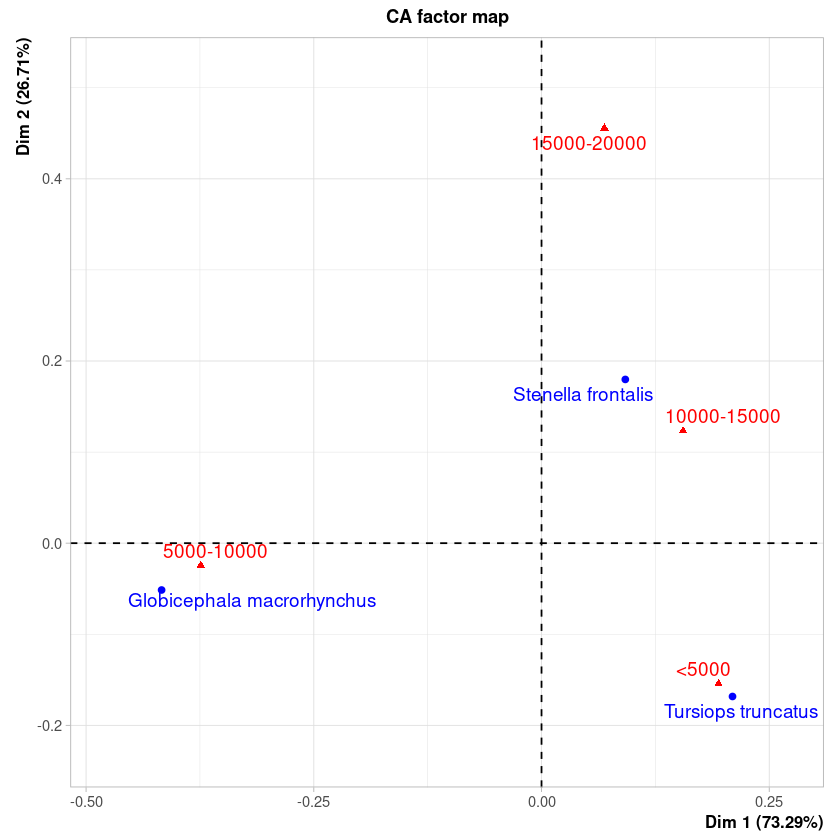

In [43]:
library(FactoMineR)
res.ca <- CA(tbl_cont)
summary(res.ca, nb.dec = 2, ncp = 2, nbelements = 5)